In [13]:
#libararies required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [14]:
df = pd.read_csv('mutual_fund_ab_test_data.csv')

In [15]:
# Clean Data
df['HighRiskPercent'] = df['HighRiskPercent'].astype(float)
df['AvgPortfolioReturn'] = df['AvgPortfolioReturn'].astype(float)
df['TimeTakenSeconds'] = df['TimeTakenSeconds'].astype(int)

In [16]:
# Seperating the data into two groups
group_a = df[df['TestGroup'] == 'A']
group_b = df[df['TestGroup'] == 'B']

In [17]:
#Statistics to know
print("Average High-Risk Selection (%)")
print("Group A:", group_a['HighRiskPercent'].mean())
print("Group B:", group_b['HighRiskPercent'].mean())

print("\nAverage Portfolio Return")
print("Group A:", group_a['AvgPortfolioReturn'].mean())
print("Group B:", group_b['AvgPortfolioReturn'].mean())


Average High-Risk Selection (%)
Group A: nan
Group B: nan

Average Portfolio Return
Group A: nan
Group B: nan


In [18]:
#T-Tests
t1, p1 = ttest_ind(group_a['HighRiskPercent'], group_b['HighRiskPercent'])
t2, p2 = ttest_ind(group_a['AvgPortfolioReturn'], group_b['AvgPortfolioReturn'])

print(f"\nT-test on High-Risk %: t={t1:.2f}, p={p1:.4f}")
print(f"T-test on Avg Portfolio Return: t={t2:.2f}, p={p2:.4f}")


T-test on High-Risk %: t=nan, p=nan
T-test on Avg Portfolio Return: t=nan, p=nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [19]:
# Chi-square test (ClickedFundDetails vs TestGroup)
contingency = pd.crosstab(df['TestGroup'], df['ClickedFundDetails'])
chi2, chi_p, _, _ = chi2_contingency(contingency)

print(f"\nChi-square on ClickedFundDetails: p={chi_p:.4f}")
print(contingency)



Chi-square on ClickedFundDetails: p=0.0111
ClickedFundDetails  No  Yes
TestGroup                  
Fund10               2    3
Fund11               6    3
Fund12               3    3
Fund13               1    6
Fund14               1    3
Fund15               3    0
Fund16               4    0
Fund4                0    1
Fund6                2    0
Fund7                0    1
Fund8                0    3
Fund9                0    5


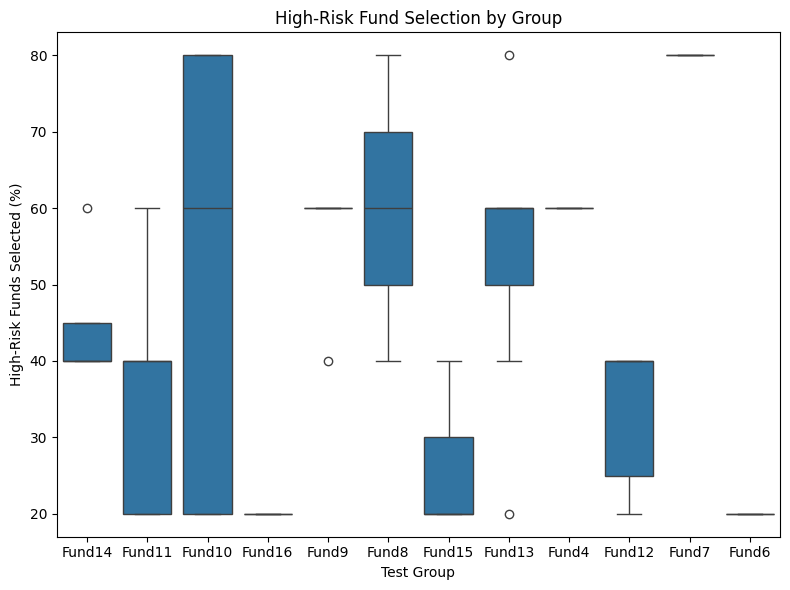

In [24]:
#Visualization 1: High Risk Selection
plt.figure(figsize=(8, 6))
sns.boxplot(x='TestGroup', y='HighRiskPercent', data=df)
plt.title("High-Risk Fund Selection by Group")
plt.ylabel("High-Risk Funds Selected (%)")
plt.xlabel("Test Group")
plt.tight_layout()
plt.show()

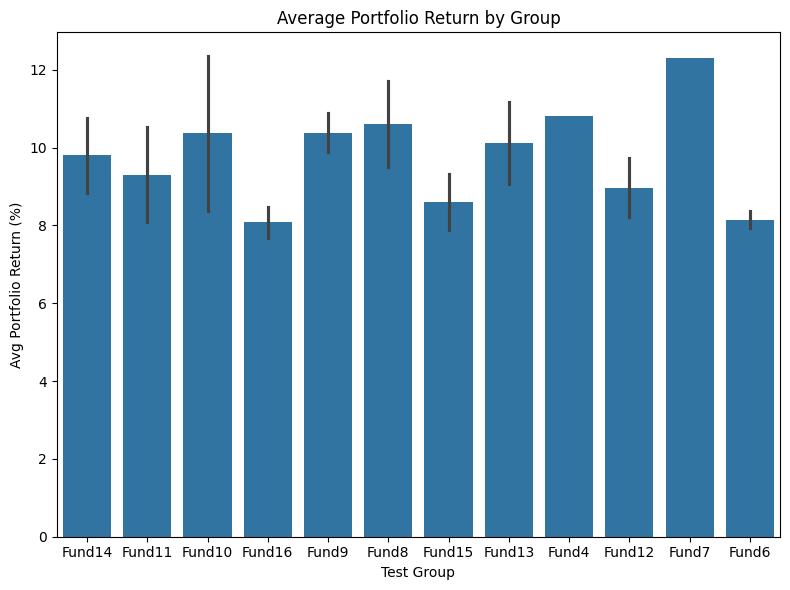

In [26]:
#Visualization 2: Avgerage Returns
plt.figure(figsize=(8, 6))
sns.barplot(x='TestGroup', y='AvgPortfolioReturn', data=df, errorbar='sd')
plt.title("Average Portfolio Return by Group")
plt.ylabel("Avg Portfolio Return (%)")
plt.xlabel("Test Group")
plt.tight_layout()
plt.show()

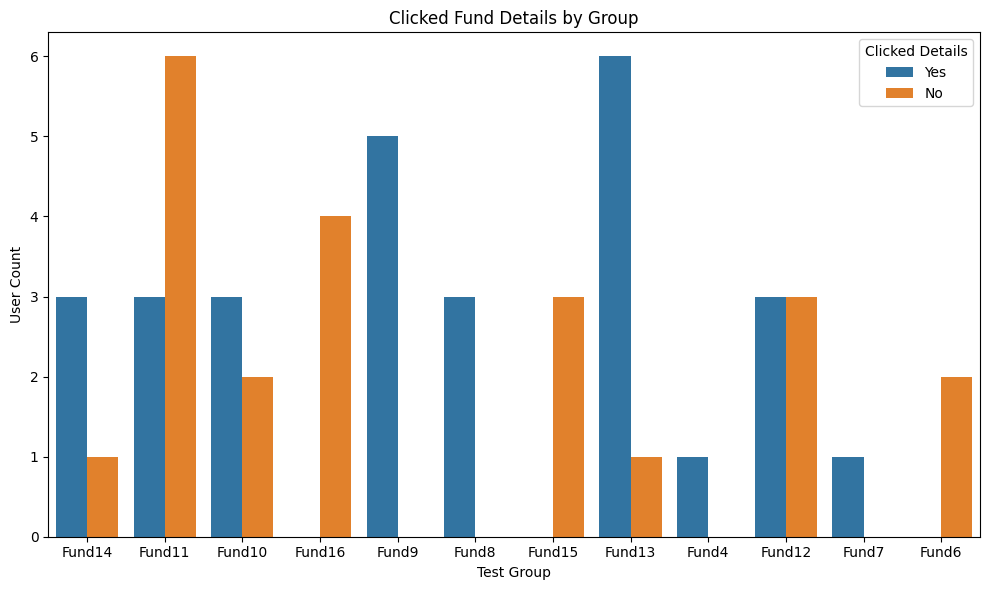

In [27]:
#Visualization 3: Clicked Fund Details
plt.figure(figsize=(10, 6))
sns.countplot(x='TestGroup', hue='ClickedFundDetails', data=df)
plt.title("Clicked Fund Details by Group")
plt.xlabel("Test Group")
plt.ylabel("User Count")
plt.legend(title="Clicked Details")
plt.tight_layout()
plt.show()

In [23]:
# Insights to be known from the analysis
print("\n🧠 Insights:")

if p1 < 0.05:
    print("- Risk labels significantly influenced fund selection (p < 0.05)")
else:
    print("- No statistically significant difference in high-risk fund selection.")

if p2 < 0.05:
    print("- Average return differs significantly across groups.")
else:
    print("- No significant difference in average portfolio return.")

if chi_p < 0.05:
    print("- Users in one group clicked fund details significantly more often.")
else:
    print("- No significant difference in exploration behavior.")


🧠 Insights:
- No statistically significant difference in high-risk fund selection.
- No significant difference in average portfolio return.
- Users in one group clicked fund details significantly more often.
